In [56]:
import batoid
import yaml
import os
import time
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename = os.path.join(batoid.datadir, 'HSC', 'HSC3.yaml')
config = yaml.load(open(filename))
fiducial_telescope = batoid.parse.parse_optic(config['opticalSystem'])

In [6]:
def perturb(PM_dx=0, PM_dy=0,
            cam_dx=0, cam_dy=0, cam_dz=0):
    telescope = fiducial_telescope
    if not (PM_dx == PM_dy == 0):
        telescope = telescope.withShift('PM', PM_dx, PM_dy, 0.0)
    if not (cam_dx == cam_dy == cam_dz == 0):
        for elt in ['G1', 'G1E', 'G2', 'G2E', 
                    'ADC1', 'ADC1E', 'ADC2', 'ADC2E',
                    'G3', 'G3E', 'G4', 'G4E',
                    'G5', 'G5E', 'F', 'FE', 'W', 'WE', 'D']:
            telescope = telescope.withShift(elt, cam_dx, cam_dy, cam_dz)
    return telescope

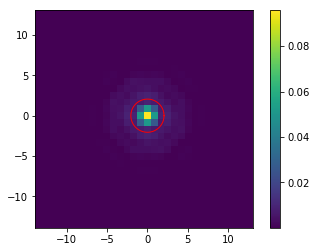

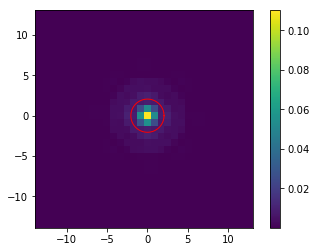

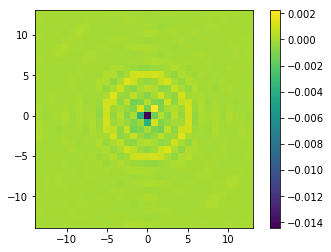

In [36]:
# Get Huygens and FFT PSFs for in-focus telescope and compare
airy_radius = 1.22*750e-9/8.2*206265 # arcsec
airy_radius /= 0.168 # pixels
airy_radius *= 15 # microns

th = np.linspace(0, 2*np.pi, 100)
cth = airy_radius*np.cos(th)
sth = airy_radius*np.sin(th)

theta_x = 0.0
theta_y = 0.0
wavelength = 750e-9

telescope = fiducial_telescope
telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y)
fftpsf = fftpsf[16:-16, 16:-16]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.plot(cth, sth, c='r', lw=1)
plt.colorbar()
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration, 
    xcos, ycos, zcos,
    50, 500, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)
xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.plot(cth, sth, c='r', lw=1)
plt.colorbar()
plt.show()

plt.imshow(fftpsf/fftpsf.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.show()

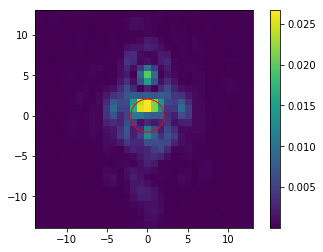

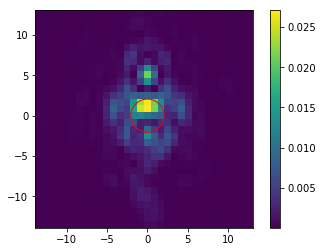

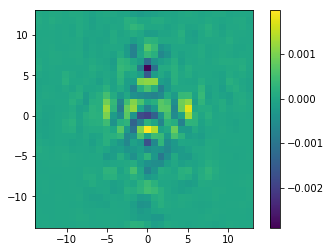

In [37]:
# Get Huygens and FFT PSFs for in-focus telescope and compare
airy_radius = 1.22*750e-9/8.2*206265 # arcsec
airy_radius /= 0.168 # pixels
airy_radius *= 15 # microns

th = np.linspace(0, 2*np.pi, 100)
cth = airy_radius*np.cos(th)
sth = airy_radius*np.sin(th)

theta_x = 0.0
theta_y = 0.75
wavelength = 750e-9

telescope = fiducial_telescope
telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y)
fftpsf = fftpsf[16:-16, 16:-16]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.plot(cth, sth, c='r', lw=1)
plt.colorbar()
plt.show()

xmin = extent[0]*1e-6 # meters
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration, 
    xcos, ycos, zcos,
    50, 500, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.plot(cth, sth, c='r', lw=1)
plt.colorbar()
plt.show()

plt.imshow(fftpsf/fftpsf.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.show()

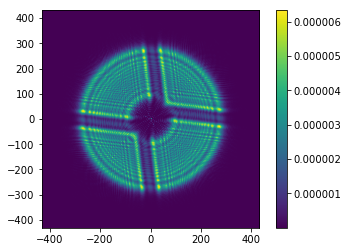

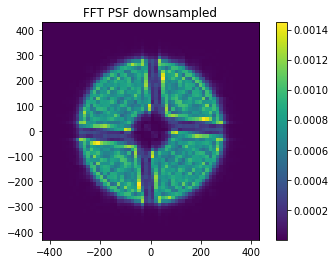

440198


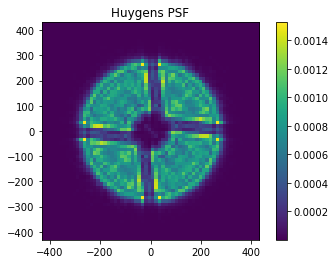

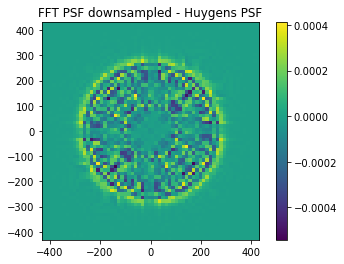

Took  144.5 seconds


In [63]:
t0 = time.time()

# Get Huygens and FFT PSFs for in-focus telescope and compare
theta_x = 0.0
theta_y = 0.0
wavelength = 750e-9
cam_dz = 900e-6

telescope = (fiducial_telescope
        .withGloballyShiftedOptic("SubaruHSC.HSC", batoid.Vec3(0, 0, cam_dz))
)

telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

nx=1024
scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y, nx=nx)
fftpsf = fftpsf[512:-512, 512:-512]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.show()

fftpsf_sub = fftpsf[8::16, 8::16]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf_sub.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    24, 96, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    400, 2000, wavelength, telescope.inMedium
)
print(len(orig_rays))
huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()

plt.imshow(fftpsf_sub/fftpsf_sub.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled - Huygens PSF")
plt.show()

t1 = time.time()
print("Took {:6.1f} seconds".format(t1-t0))

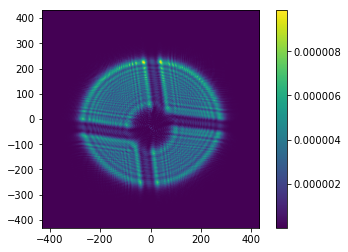

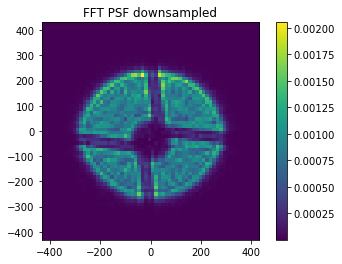

440198


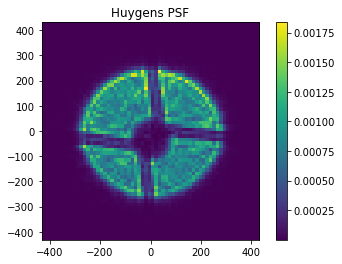

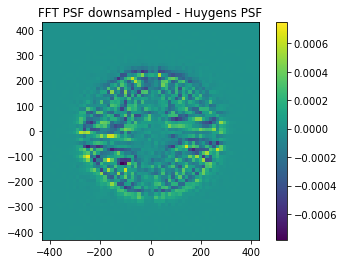

Took  132.0 seconds


In [64]:
t0 = time.time()

# Get Huygens and FFT PSFs for in-focus telescope and compare
theta_x = 0.0
theta_y = 0.375
wavelength = 750e-9
cam_dz = 900e-6

telescope = (fiducial_telescope
        .withGloballyShiftedOptic("SubaruHSC.HSC", batoid.Vec3(0, 0, cam_dz))
)

telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

nx=1024
scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y, nx=nx)
fftpsf = fftpsf[512:-512, 512:-512]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.show()

fftpsf_sub = fftpsf[8::16, 8::16]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf_sub.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    24, 96, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    400, 2000, wavelength, telescope.inMedium
)
print(len(orig_rays))
huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()

plt.imshow(fftpsf_sub/fftpsf_sub.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled - Huygens PSF")
plt.show()

t1 = time.time()
print("Took {:6.1f} seconds".format(t1-t0))

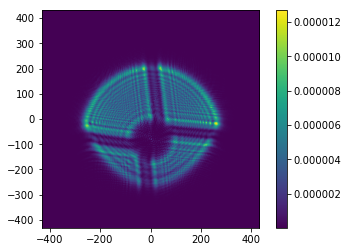

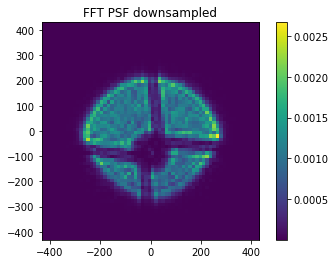

440198


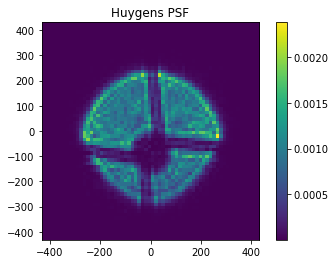

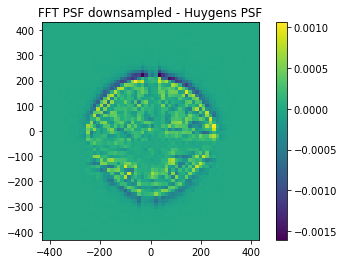

Took  101.5 seconds


In [69]:
t0 = time.time()

# Get Huygens and FFT PSFs for in-focus telescope and compare
theta_x = 0.0
theta_y = 0.74
wavelength = 750e-9
cam_dz = 900e-6

telescope = (fiducial_telescope
        .withGloballyShiftedOptic("SubaruHSC.HSC", batoid.Vec3(0, 0, cam_dz))
)

telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

nx=1024
scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y, nx=nx)
fftpsf = fftpsf[512:-512, 512:-512]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.show()

fftpsf_sub = fftpsf[8::16, 8::16]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf_sub.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    24, 96, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    400, 2000, wavelength, telescope.inMedium
)
print(len(orig_rays))
huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()

plt.imshow(fftpsf_sub/fftpsf_sub.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled - Huygens PSF")
plt.show()

t1 = time.time()
print("Took {:6.1f} seconds".format(t1-t0))

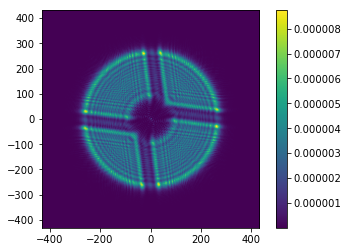

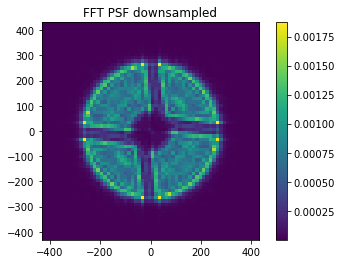

440198


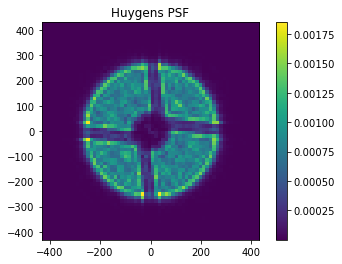

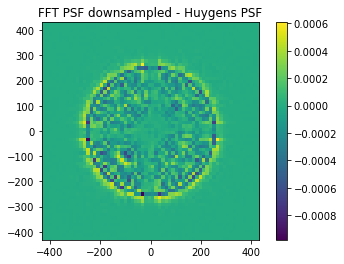

Took  151.7 seconds


In [66]:
# Repeat for intrafocal
t0 = time.time()

# Get Huygens and FFT PSFs for in-focus telescope and compare
theta_x = 0.0
theta_y = 0.0
wavelength = 750e-9
cam_dz = -900e-6

telescope = (fiducial_telescope
        .withGloballyShiftedOptic("SubaruHSC.HSC", batoid.Vec3(0, 0, cam_dz))
)

telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

nx=1024
scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y, nx=nx)
fftpsf = fftpsf[512:-512, 512:-512]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.show()

fftpsf_sub = fftpsf[8::16, 8::16]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf_sub.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    24, 96, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    400, 2000, wavelength, telescope.inMedium
)
print(len(orig_rays))
huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()

plt.imshow(fftpsf_sub/fftpsf_sub.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled - Huygens PSF")
plt.show()

t1 = time.time()
print("Took {:6.1f} seconds".format(t1-t0))

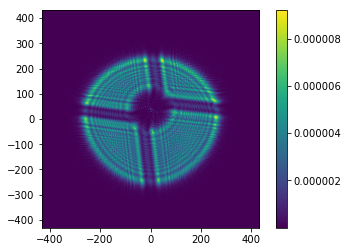

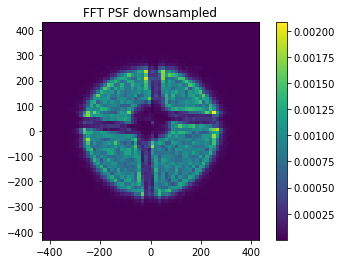

440198


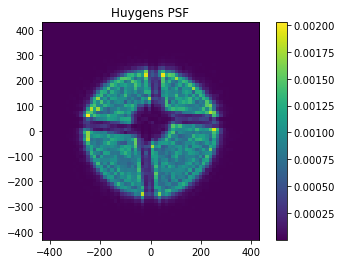

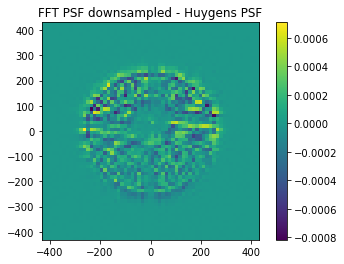

Took  129.6 seconds


In [67]:
# Repeat for intrafocal
t0 = time.time()

# Get Huygens and FFT PSFs for in-focus telescope and compare
theta_x = 0.0
theta_y = 0.375
wavelength = 750e-9
cam_dz = -900e-6

telescope = (fiducial_telescope
        .withGloballyShiftedOptic("SubaruHSC.HSC", batoid.Vec3(0, 0, cam_dz))
)

telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

nx=1024
scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y, nx=nx)
fftpsf = fftpsf[512:-512, 512:-512]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.show()

fftpsf_sub = fftpsf[8::16, 8::16]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf_sub.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    24, 96, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    400, 2000, wavelength, telescope.inMedium
)
print(len(orig_rays))
huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()

plt.imshow(fftpsf_sub/fftpsf_sub.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled - Huygens PSF")
plt.show()

t1 = time.time()
print("Took {:6.1f} seconds".format(t1-t0))

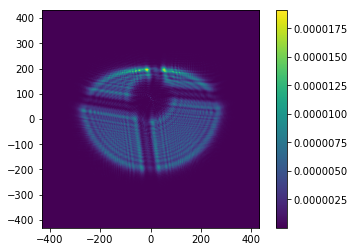

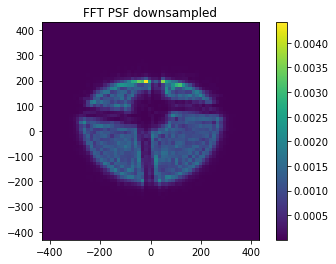

440198


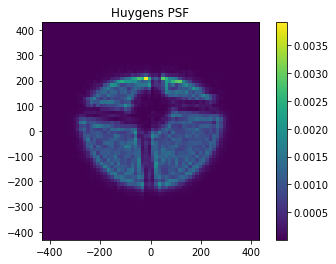

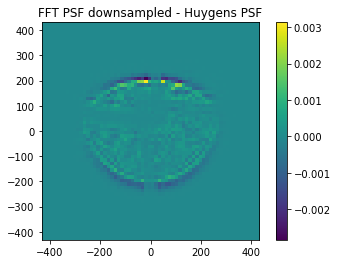

Took   98.5 seconds


In [70]:
# Repeat for intrafocal
t0 = time.time()

# Get Huygens and FFT PSFs for in-focus telescope and compare
theta_x = 0.0
theta_y = 0.74
wavelength = 750e-9
cam_dz = -900e-6

telescope = (fiducial_telescope
        .withGloballyShiftedOptic("SubaruHSC.HSC", batoid.Vec3(0, 0, cam_dz))
)

telescope.dist = 20.0
telescope.pupil_size = 8.2
telescope.pupil_obscuration = 0.1
telescope.sphereRadius = 10.5

nx=1024
scale, fftpsf = batoid.fftPSF(telescope, wavelength, theta_x, theta_y, nx=nx)
fftpsf = fftpsf[512:-512, 512:-512]
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.168 # pixels
extent *= 15 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.show()

fftpsf_sub = fftpsf[8::16, 8::16]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, fftpsf_sub.shape[0])
xs, ys = np.meshgrid(xs, xs)

xcos = np.sin(theta_x*np.pi/180)
ycos = np.sin(theta_y*np.pi/180)
zcos = -np.sqrt(1.0 - xcos**2 - ycos**2)
orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    24, 96, wavelength, telescope.inMedium
)
traced_rays, _ = telescope.trace(orig_rays)    
goodRays = batoid.trimVignetted(traced_rays)

xs += np.mean(goodRays.x)
ys += np.mean(goodRays.y)

orig_rays = batoid.circularGrid(
    telescope.dist, telescope.pupil_size/2, telescope.pupil_size/2*telescope.pupil_obscuration,     
    xcos, ycos, zcos,
    400, 2000, wavelength, telescope.inMedium
)
print(len(orig_rays))
huygensPSF = batoid.huygensPSF(telescope, xs=xs, ys=ys, zs=None, rays=orig_rays, saveRays=False)

plt.imshow(huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()

plt.imshow(fftpsf_sub/fftpsf_sub.sum() - huygensPSF/huygensPSF.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled - Huygens PSF")
plt.show()

t1 = time.time()
print("Took {:6.1f} seconds".format(t1-t0))